# 데이터 시각화 핵심 표인트

In [5]:
from hossam import load_data
from matplotlib import pyplot as plt
import seaborn as sb

In [19]:
# 데이터 불러오기
origin = load_data('traffic_acc')
origin



[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [24]:
df = origin.drop('월', axis = 1).groupby('년도').sum()
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [18]:
data=origin.melt(id_vars=['년도'], value_vars=(['사망자수','부상자수'])) 
value_vars=(['사망자수','부상자수'])
data

,년도,variable,value
0,2005,사망자수,504
1,2005,사망자수,431
2,2005,사망자수,477
3,2005,사망자수,507
4,2005,사망자수,571
...,...,...,...
331,2018,부상자수,27749
332,2018,부상자수,27751
333,2018,부상자수,28836
334,2018,부상자수,28000


In [25]:
# 전처리 코드 작성


# 그래프 초기화

In [26]:
my_dpi = 120
my_font_name = "Noto Sans Kr"
my_theme = "whitegrid"

sb.set_theme(style=my_theme) 
# 화풍 설정하기

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False


# 02.시각화 기본 코드

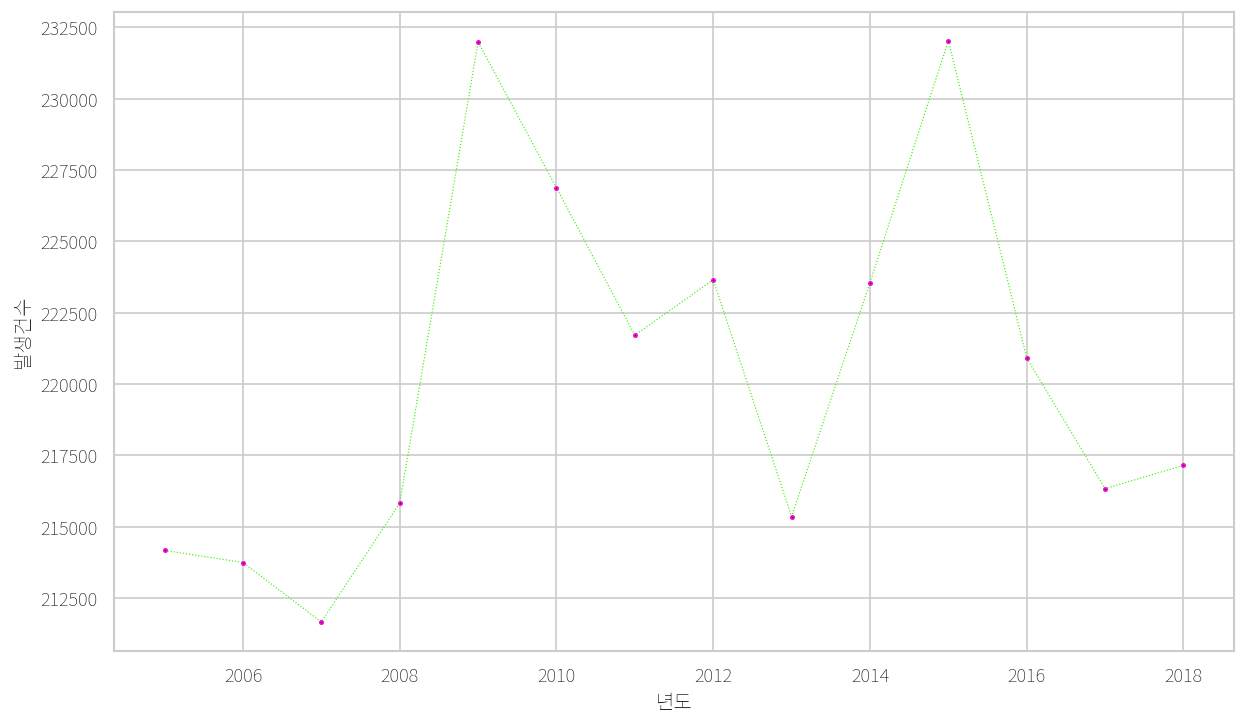

In [29]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.lineplot(data=df, x=df.index, y='발생건수',
            color="#39F206", linewidth=0.7, linestyle=':', 
            marker="o", markersize=2,
            markerfacecolor="#3F0CF5",
            markeredgecolor="#F70EBC", markeredgewidth=1)

ax.grid(True)


plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

# 03.다중 그래프

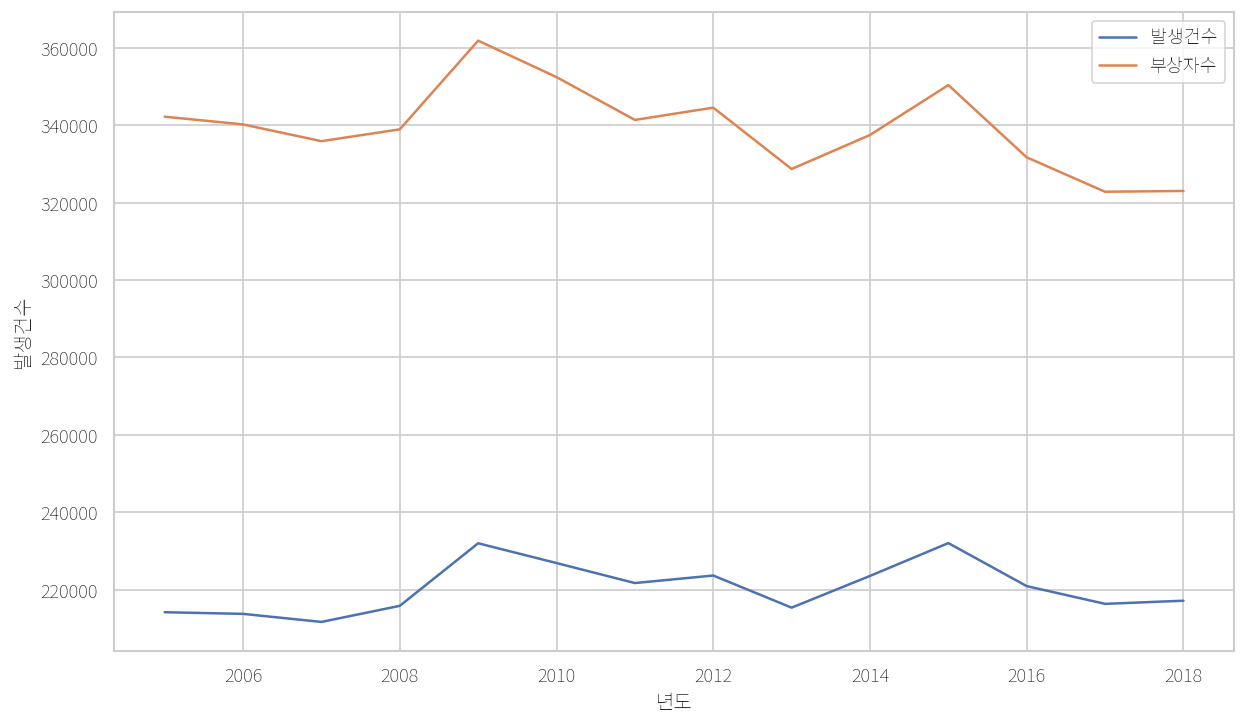

In [32]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.lineplot(data=df, x=df.index, y='발생건수', label='발생건수')
sb.lineplot(data=df, x=df.index, y='부상자수', label='부상자수')

ax.grid(True)

plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

# 04.hue 파라미터 이해하기

In [34]:
df =df.reset_index()
df

,index,년도,발생건수,사망자수,부상자수
0,0,2005,214171,6376,342233
1,1,2006,213745,6327,340229
2,2,2007,211662,6166,335906
3,3,2008,215822,5870,338962
4,4,2009,231990,5838,361875
5,5,2010,226878,5505,352458
6,6,2011,221711,5229,341391
7,7,2012,223656,5392,344565
8,8,2013,215354,5092,328711
9,9,2014,223552,4762,337497


In [35]:
df2 = origin.melt(id_vars='년도',value_vars=['발생건수','사망자수','부상자수'],
                  var_name='구분')
df2

,년도,구분,value
0,2005,발생건수,15494
1,2005,발생건수,13244
2,2005,발생건수,16580
3,2005,발생건수,17817
4,2005,발생건수,19085
...,...,...,...
499,2018,부상자수,27749
500,2018,부상자수,27751
501,2018,부상자수,28836
502,2018,부상자수,28000


# hue파라미터를 사용한 시각화

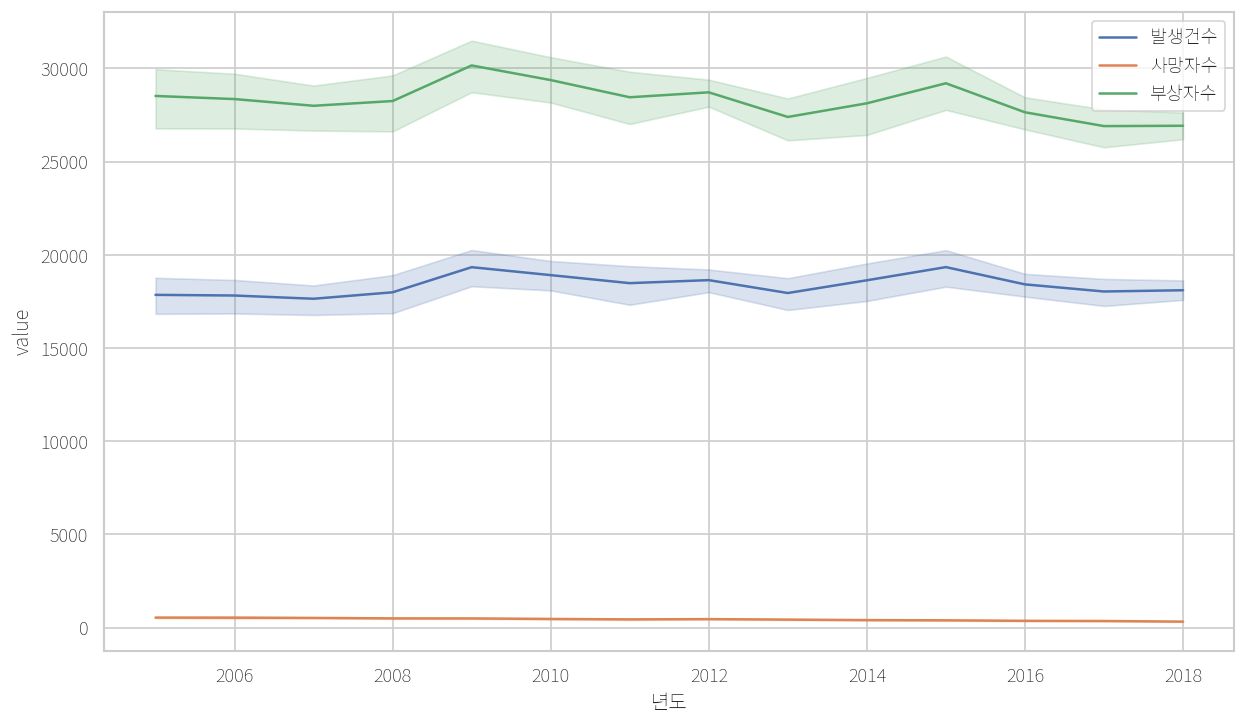

In [37]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.lineplot(data=df2, x="년도", y="value", hue="구분")

ax.grid(True)
ax.legend(loc="upper right")

plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()